<a href="https://colab.research.google.com/github/female-coders-linz/workshops/blob/master/object_detection/Object_detection_Star_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object detection using YOLOv8

In this notebook we want to automatically detect objects of a certain domain in images. The use case is one project which was done in a Female Coders Hackathon where the goal of the project was to automatically detect star images.

For this we use a pre-trained model called "YOLO-8". This notebook is based on this [GitHub notebook](https://github.com/roboflow/notebooks/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb)


## Preparations

### Enable GPU Acceleration
If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `T4 GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

Let's ensure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `T4 GPU`, and then click `Save`.



In [1]:
!nvidia-smi

Tue Oct 10 18:01:01 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Set HOME

Set HOME as environment variable. We will need it later one to make sure we execute scripts / download files in the correct directory

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content



### Install YOLOv8

We use `pip` to install YOLOv8.

In [3]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## First predictions with YOLOv8

Let's use YOLOv8 to make first predictions to see how smart it already is. 🙂

For this we can use the CLI (=Command Line Interface): `yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

  1. run `predict` (provided via `mode`) on an image (provided via `source`).

In [5]:
dog_image = 'https://media.roboflow.com/notebooks/examples/dog.jpeg'
%cd {HOME}
!yolo task=classify mode=predict model=yolov8n-cls.pt conf=0.25 source={dog_image}

/content
100% 5.28M/5.28M [00:00<00:00, 18.5MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 2715880 parameters, 0 gradients, 4.3 GFLOPs

100% 104k/104k [00:00<00:00, 90.5MB/s]
100% 755k/755k [00:00<00:00, 23.1MB/s]
image 1/1 /content/dog.jpeg: 224x224 basset 0.46, beagle 0.27, Walker_hound 0.20, English_foxhound 0.02, bloodhound 0.01, 4.3ms
Speed: 12.1ms preprocess, 4.3ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


  2. show the results of the detected objects

/content


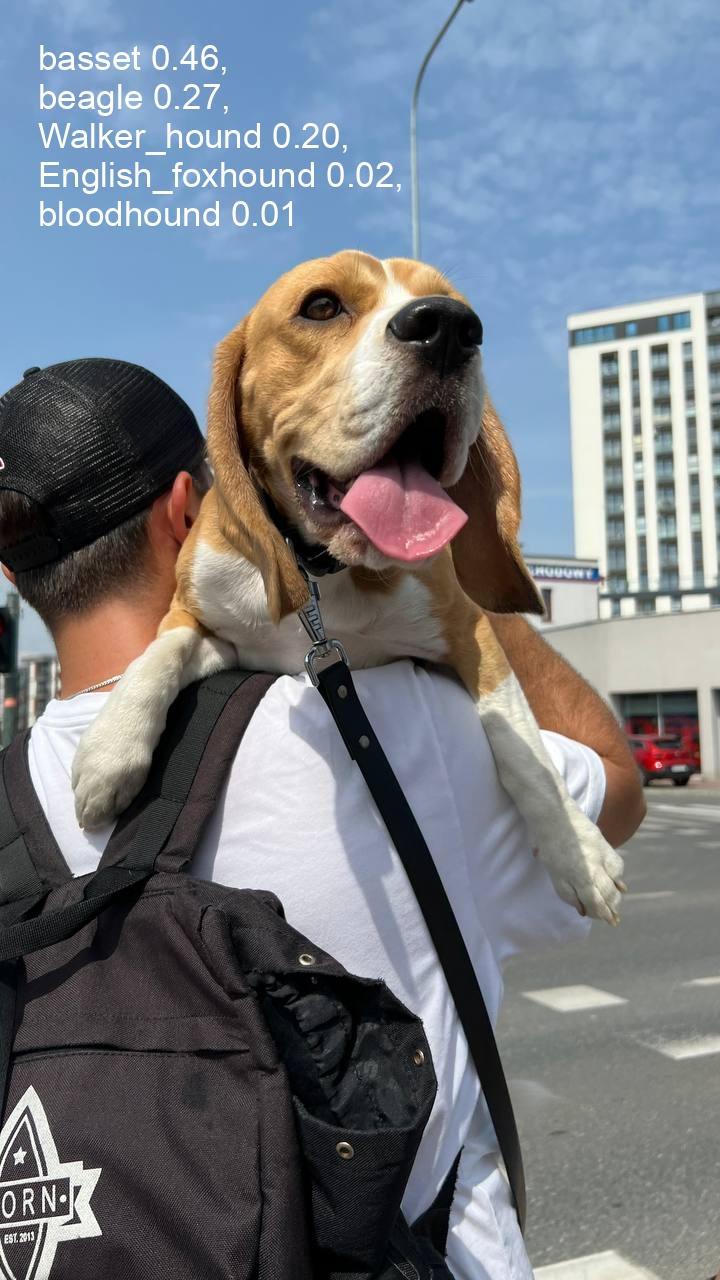

In [6]:
%cd {HOME}
Image(filename='runs/classify/predict/dog.jpeg', height=600)

Wow! 🤩🤩🤩🤩 YOLOv8 has detected not even that it is a dog, but that it is a basset (46%) or a beagle (27%).


### Predict on "my image"
Let's see what it can do with a more complex use case when we want to detect star signs. Our example is an image of a **Gemini star image**.

🚨 **Keep an eye on the folder name** - as we now do the second prediction, the folder name changes to `predict2`.

In case you want to delete old prediction runs, just run the following command
```
!rm -r /content/runs/classify/<folder_name>
```
e.g.
```
!rm -r /content/runs/classify/predict2
```

In [7]:
%cd {HOME}

star_image='https://www.star-registration.com/cdn/shop/articles/02_03_Gemini_1200x1200.png'

!yolo task=classify mode=predict model=yolov8n-cls.pt conf=0.25 source={star_image}


/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 2715880 parameters, 0 gradients, 4.3 GFLOPs

100% 85.6k/85.6k [00:00<00:00, 4.08MB/s]
image 1/1 /content/02_03_Gemini_1200x1200.png: 224x224 scuba_diver 0.32, jellyfish 0.16, sea_snake 0.04, great_white_shark 0.04, lionfish 0.03, 12.8ms
Speed: 2.3ms preprocess, 12.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


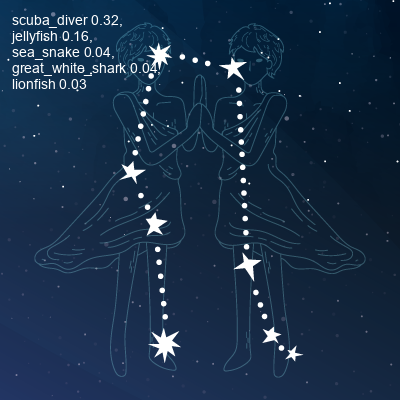

In [8]:
%cd {HOME}
Image(filename='runs/classify/predict2/02_03_Gemini_1200x1200.png', height=600)

🙈🙈🙈 Well, the result is not a very good result. It thinks it is a scuba diver - and is 32% sure of it. Actually, this image is a star image (Gemini).

Let's see if we can improve this...

## Use a custom dataset

To improve the model results, one has to provide a custom dataset and then
re-train the model. In our case, we  would provide star images as we want to detect star images / constillations.

You can create your own dataset, or use already a prepared dataset. There are various datasets online, here are a few examples

  - [Roboflow Universe ](https://universe.roboflow.com/), also provides the option to create custom datasets easily.
  - [Ultralytics Datasets list](https://docs.ultralytics.com/datasets/)

In this use case we use a pre-defined dataset from "Roboflow Universe" of [Star image Constalations](https://universe.roboflow.com/yuri-lima-lcztr/constalations-classification).


  **Important**

  In the code above we have used a **classification** model (`mode=classify`), but the dataset we are using is designed for **Object detection**, which means that it returns the object class and the position of the object.

Let's now run the previous example with an object detection model.





In [9]:
%cd {HOME}

!yolo task=detect mode=predict model=yolov8s.pt conf=0.25 source={star_image}

/content
100% 21.5M/21.5M [00:00<00:00, 125MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs

Found https://www.star-registration.com/cdn/shop/articles/02_03_Gemini_1200x1200.png locally at 02_03_Gemini_1200x1200.png
image 1/1 /content/02_03_Gemini_1200x1200.png: 640x640 1 clock, 16.5ms
Speed: 7.3ms preprocess, 16.5ms inference, 252.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


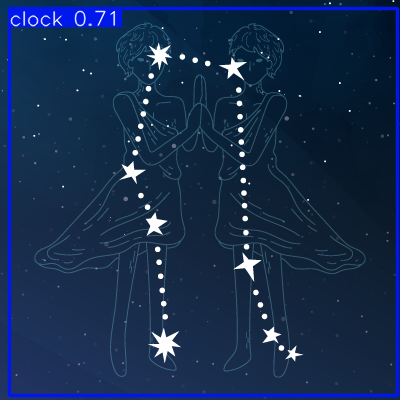

In [10]:
Image(filename='runs/detect/predict/02_03_Gemini_1200x1200.png', height=600)

We can see, the results are not better, no *sign* (pun intended 😃) of a Gemini ♊.

So, let's improve the model, by training a model specifically for our use case: to detect star signs / constillations.

### Load custom data

  1. Follow the [link](https://universe.roboflow.com/yuri-lima-lcztr/constalations-classification)
  2. Click on `Download this dataset`
  3. Select `YOLOv8` as format and click `Continue`
  4. Copy the code (small blue button) and click `Done`
  5. Insert the code here (should look similar)

In [12]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="<your api key>")
project = rf.workspace("yuri-lima-lcztr").project("constalations-classification")
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.196, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Constalations-Classification-1 in yolov8:: 100%|██████████| 1296/1296 [00:00<00:00, 8837.69it/s]


Now the data was downloaded into our environment. You can see it in your environment once you click the folder icon in the left side bar.

✋
Before we start the training of the model, we have to adapt some paths in the **data.yaml** (for this dataset).
In the side bar menu (folder), navigate to the folder `content/Constalations-Classification-1`, open `data.yaml` and **ensure** that **all paths** for `train`, `test` and `val` start with `/content/Constalations-Classification-1/`. Save the file.

### Train the model

Now, let's start the training using the CLI.

In [14]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Constalations-Classification-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format

### Inspect Results

Training is finished, so now let's inspect the results of the training and see how well the model works.


Also here, **ensure you are using the correct folder**. If you have multiple trainings, the name of the folder changes, e.g. to `train2`.

In [15]:
TRAIN_RUN = "train2"

/content


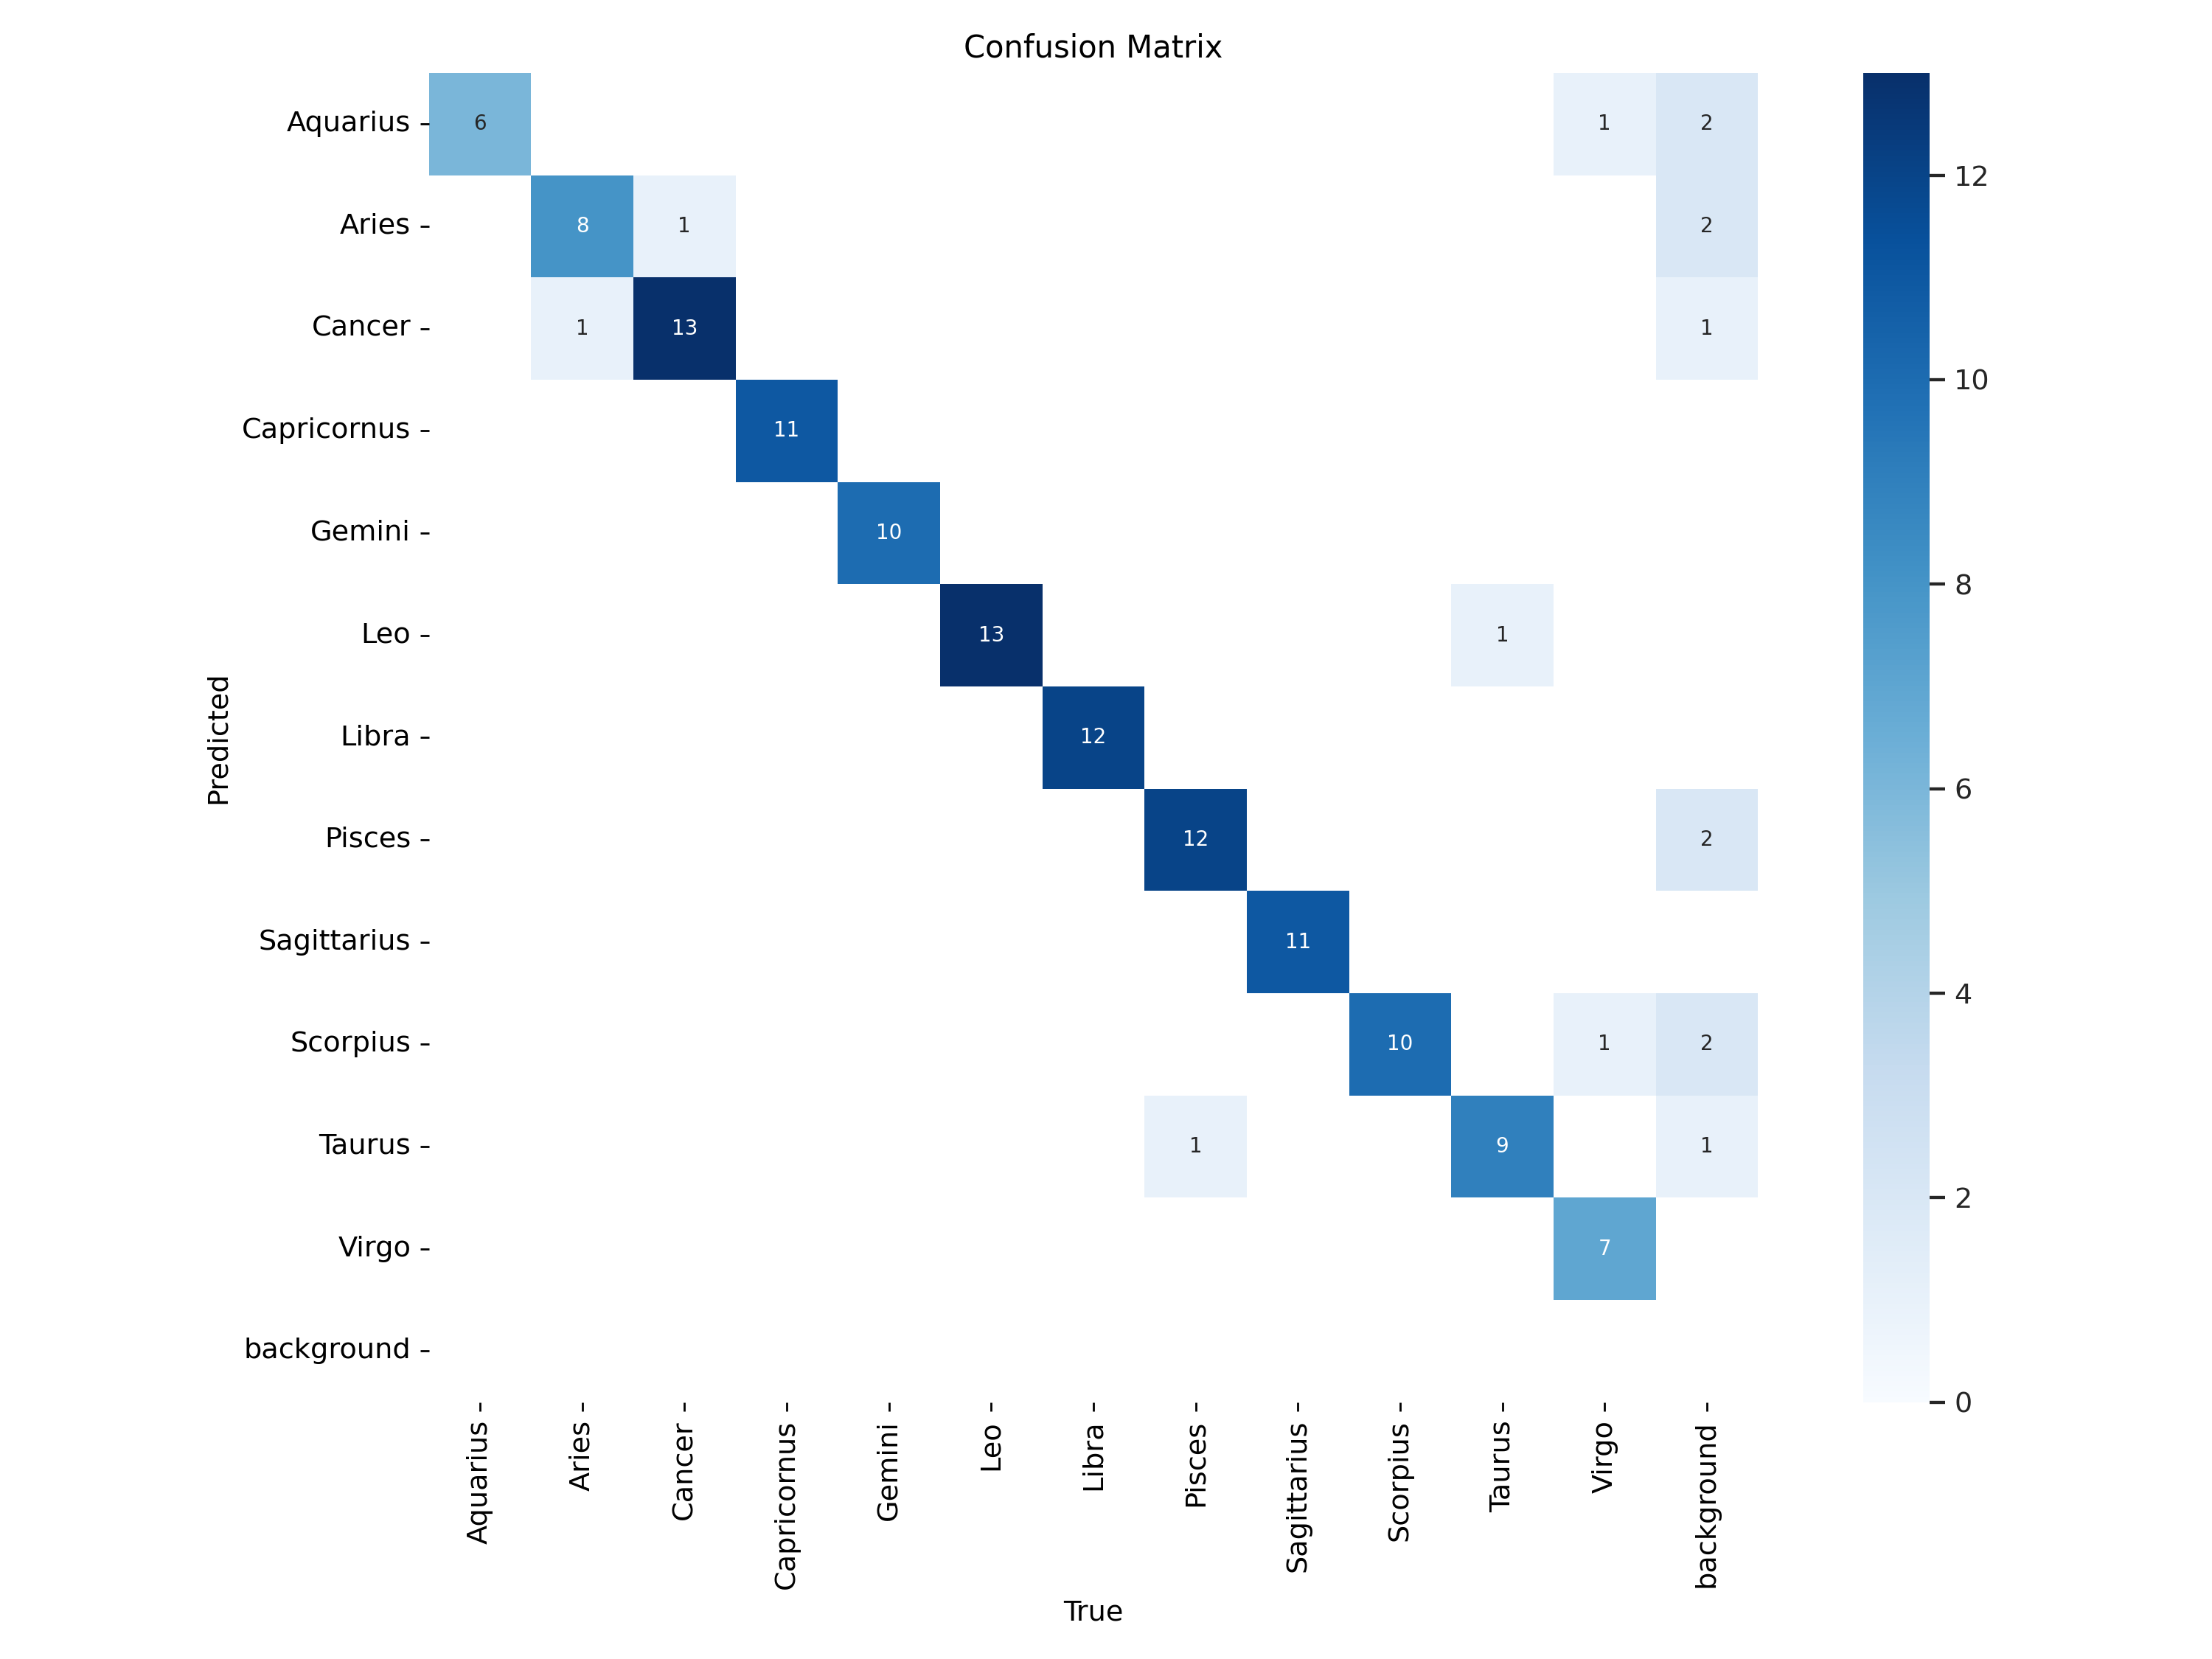

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/' + TRAIN_RUN + '/confusion_matrix.png', width=600)

/content


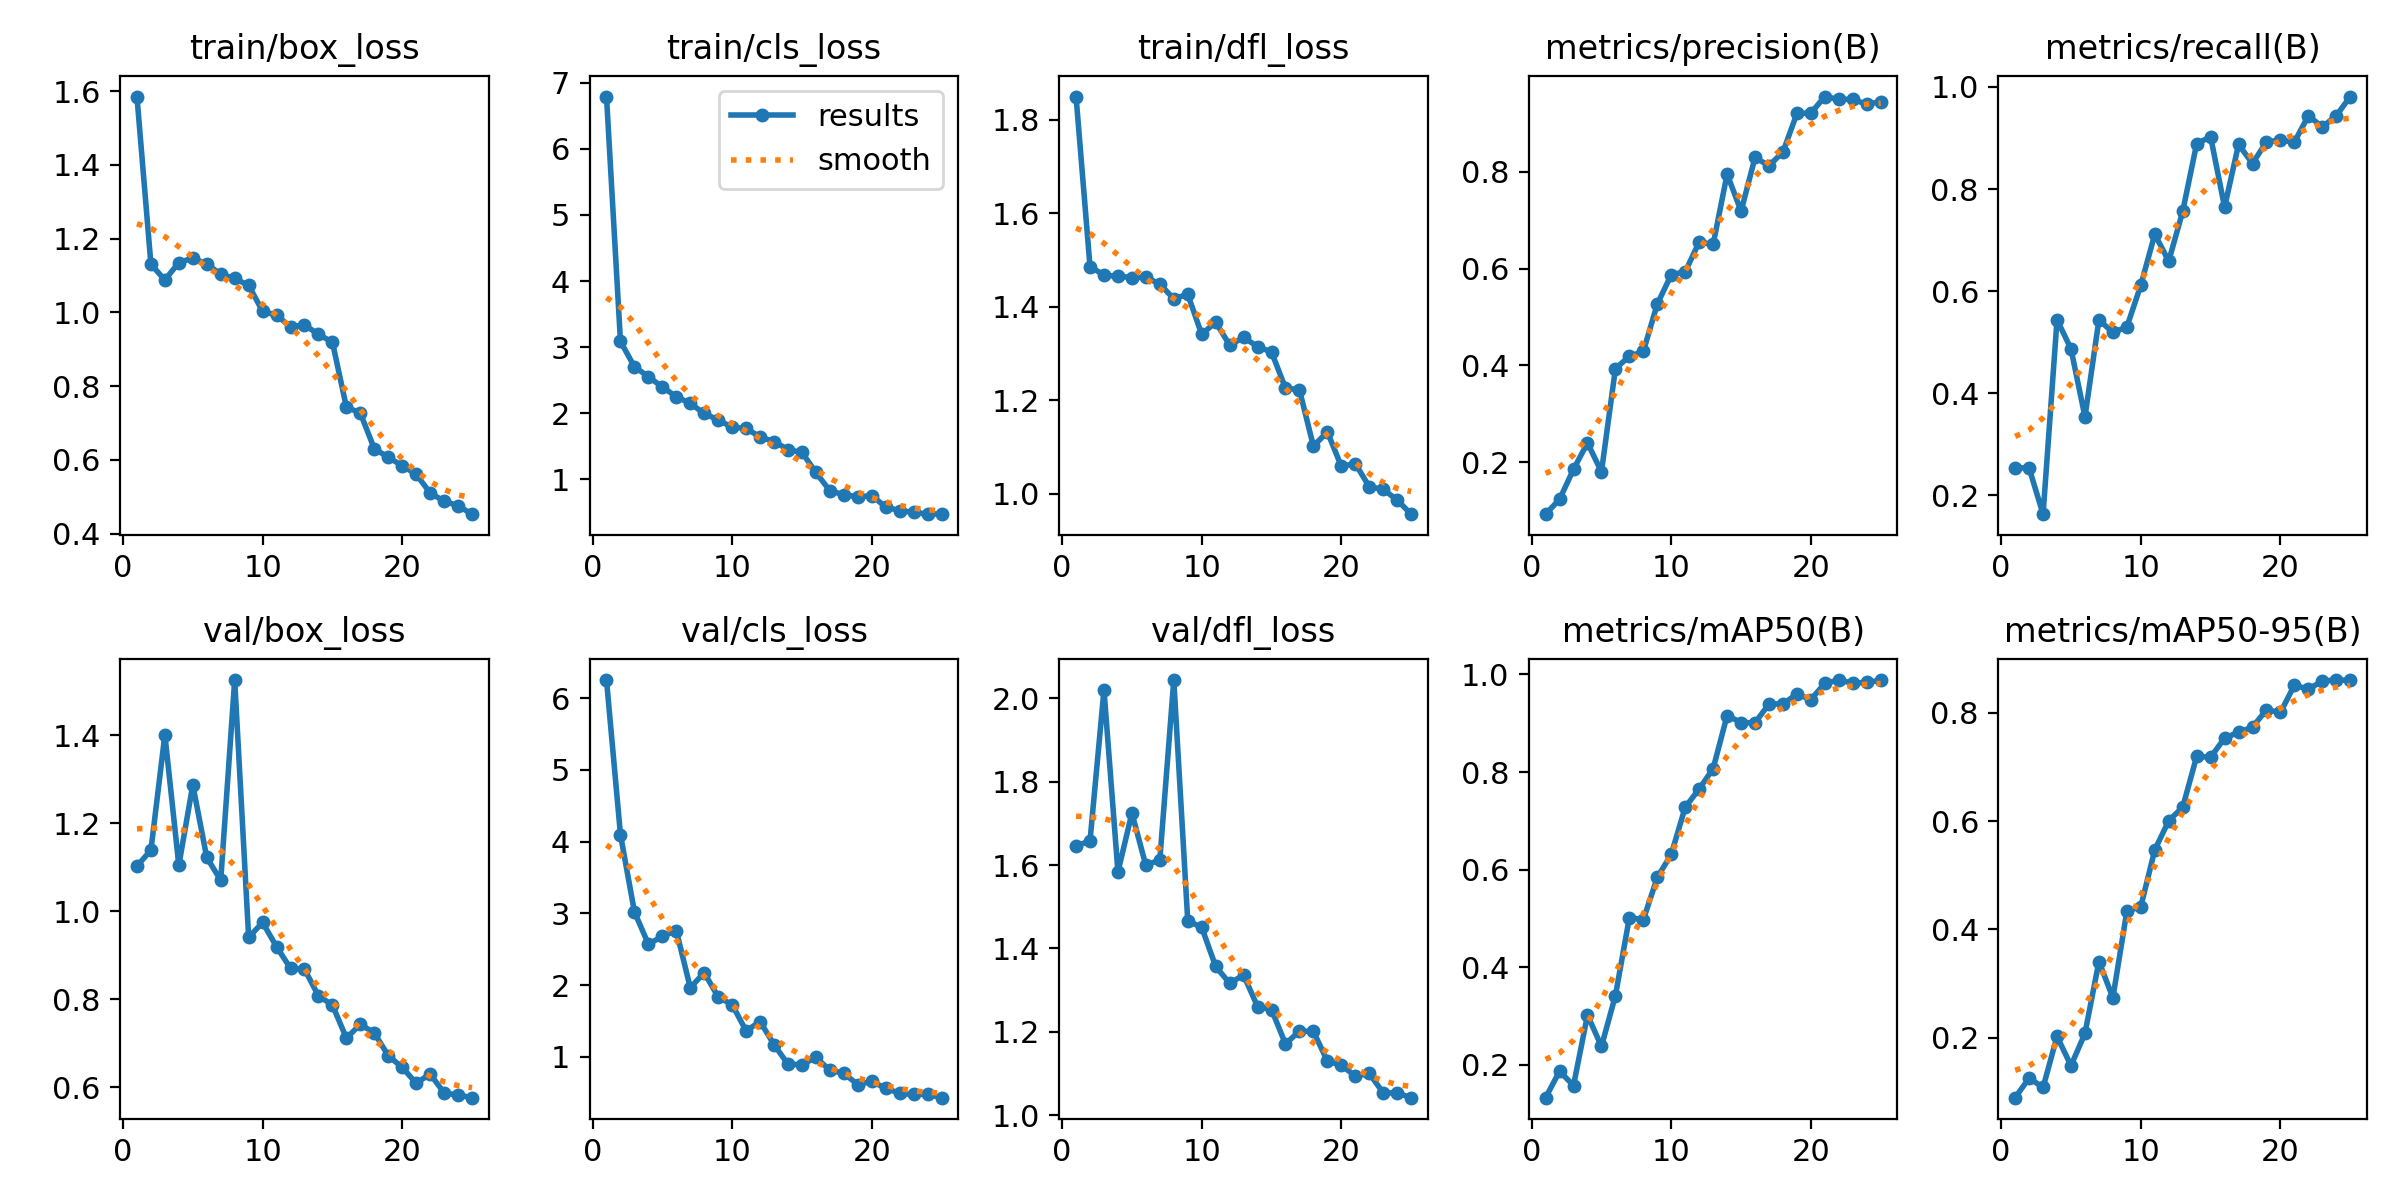

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/' + TRAIN_RUN + '/results.png', width=1000)

### Validate Custom Model

/content


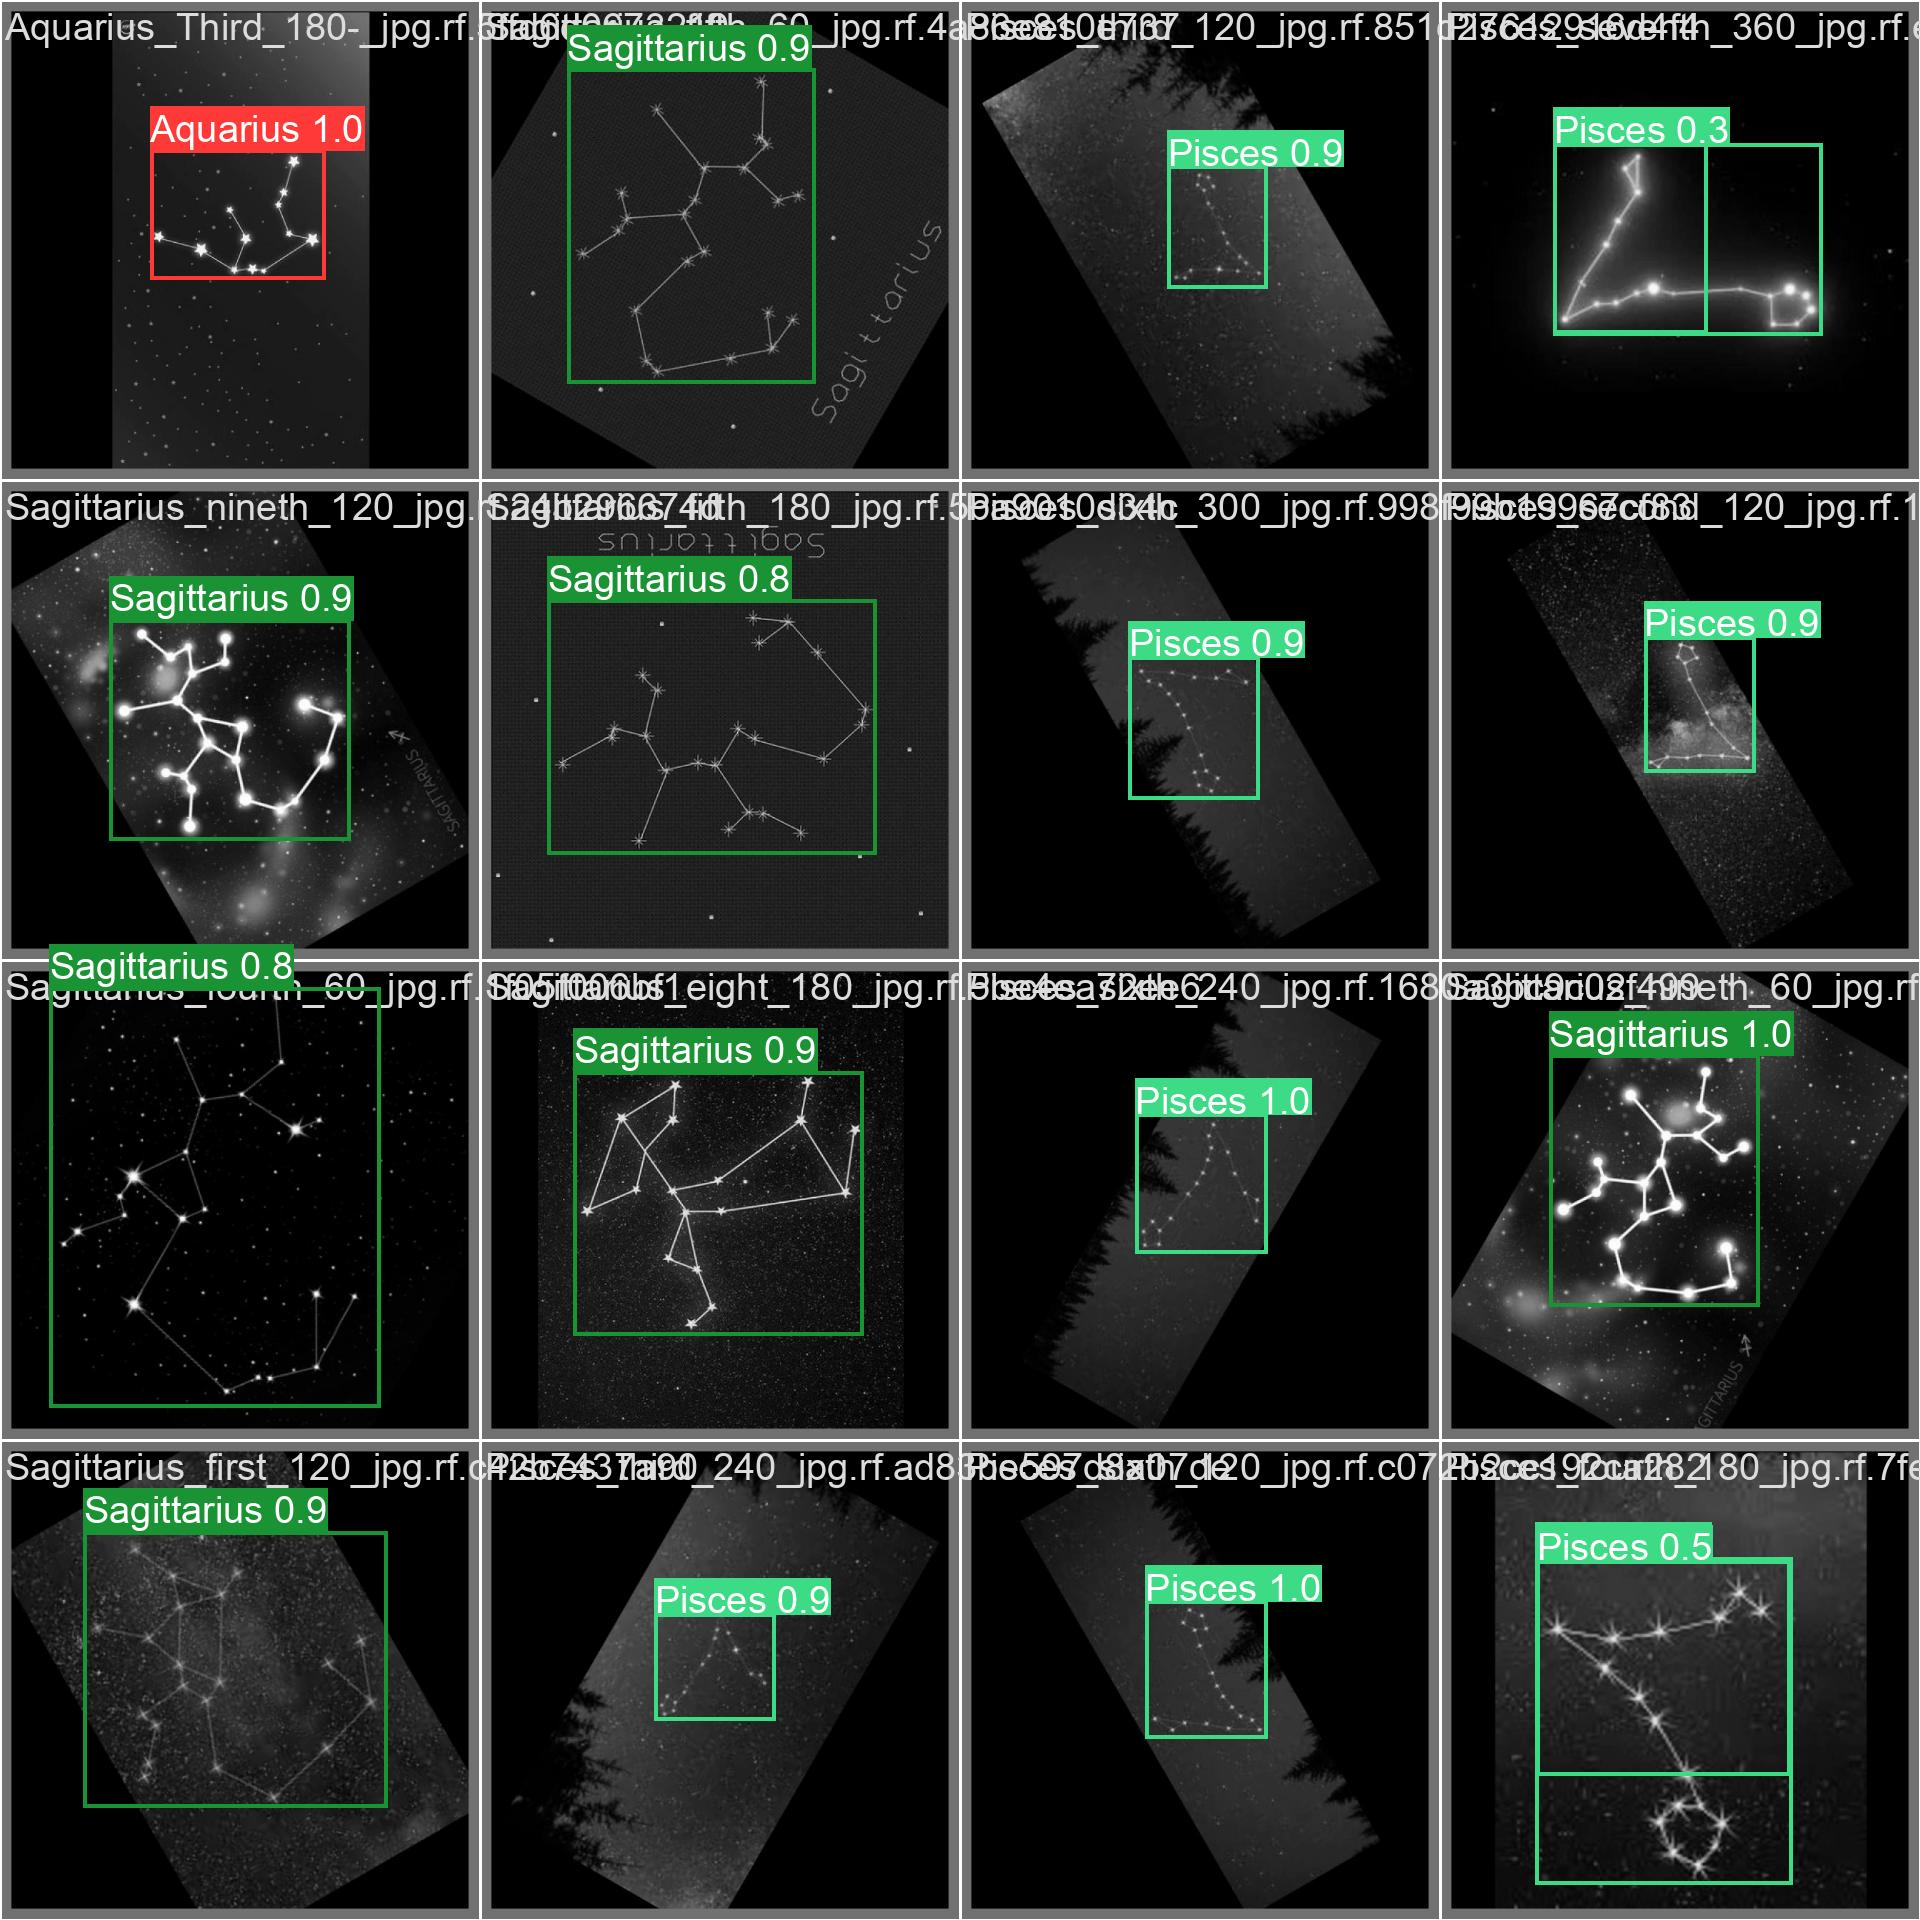

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/' + TRAIN_RUN + '/val_batch0_pred.jpg', width=600)

### [Optional] Inference with current model

Is recommended to do, to see if one model has improved compared to the previous one. We skip it for now as this was our first iteration.

In [19]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/{TRAIN_RUN}/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True



/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11130228 parameters, 0 gradients, 28.5 GFLOPs

image 1/65 /content/Constalations-Classification-1/test/images/Aquarius_Second_120-_jpg.rf.a41446044ff5b71ce44b7d9905e0ae33.jpg: 640x640 1 Aquarius, 16.3ms
image 2/65 /content/Constalations-Classification-1/test/images/Aquarius_eight_120-_jpg.rf.907a0067cd1eb10f548157c3f6d632cc.jpg: 640x640 1 Aquarius, 16.4ms
image 3/65 /content/Constalations-Classification-1/test/images/Aquarius_sixth_240-_jpg.rf.a904d240fc33db3dc47cb1cc7f22ee57.jpg: 640x640 1 Aquarius, 16.3ms
image 4/65 /content/Constalations-Classification-1/test/images/Aries_fifth_120_jpg.rf.fe2681ac3003f9e6458c2fa422de2f32.jpg: 640x640 1 Aries, 16.3ms
image 5/65 /content/Constalations-Classification-1/test/images/Aries_first_60_jpg.rf.7d0bd1d042a84e79747d5735d2bff01e.jpg: 640x640 1 Aries, 16.3ms
image 6/65 /content/Constalations-Classification-1/test/imag

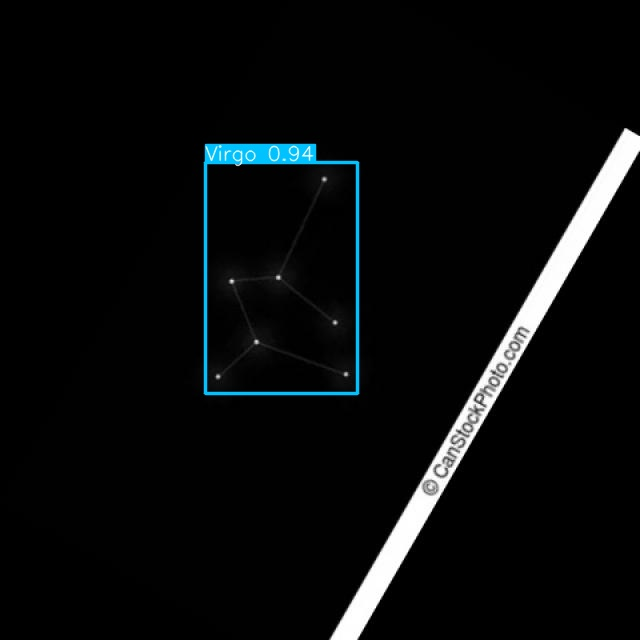

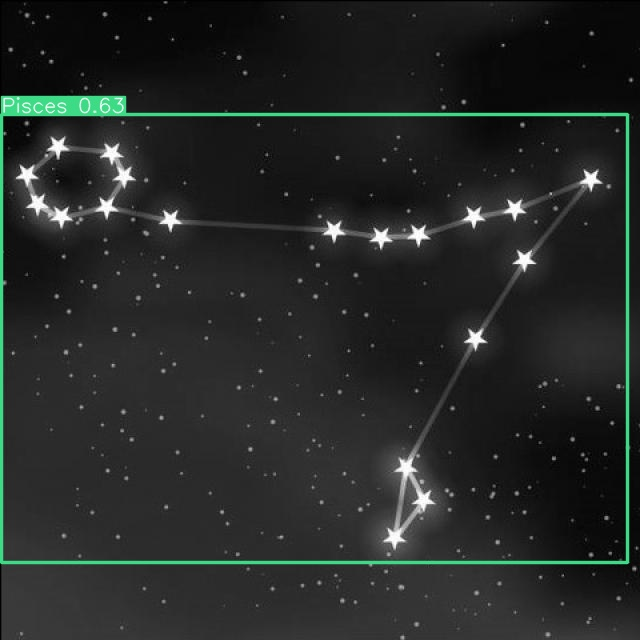

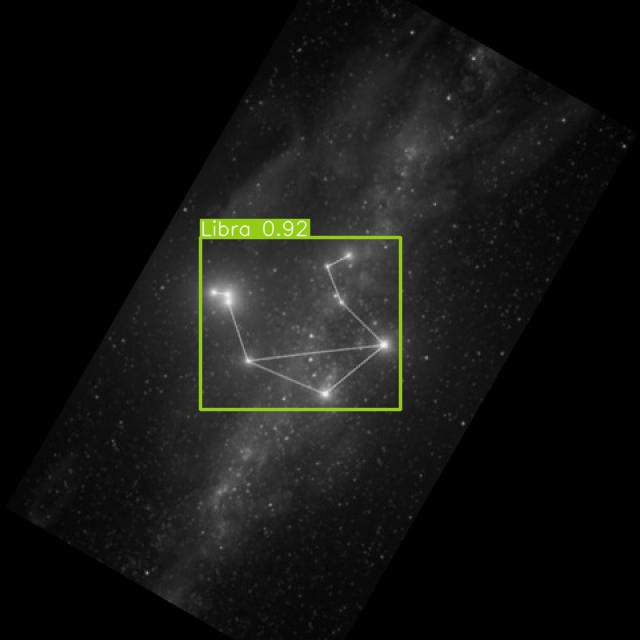

In [20]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

The results already look quite promising. Now, let's try to predict on our original Gemini image.

In [21]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/{TRAIN_RUN}/weights/best.pt conf=0.25 source={star_image} save=True


/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11130228 parameters, 0 gradients, 28.5 GFLOPs

Found https://www.star-registration.com/cdn/shop/articles/02_03_Gemini_1200x1200.png locally at 02_03_Gemini_1200x1200.png
image 1/1 /content/02_03_Gemini_1200x1200.png: 640x640 1 Gemini, 23.1ms
Speed: 7.0ms preprocess, 23.1ms inference, 214.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


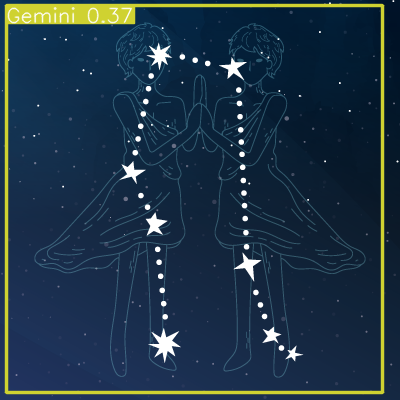

In [22]:
%cd {HOME}
Image(filename='runs/detect/predict3/02_03_Gemini_1200x1200.png', height=600)

🎉🎉🎉 Yaaaay!! 🎉🎉🎉 Now the result is correct!!!


## [EXTRA] Run in python

This section holds some sample code to load a model in python, predict results on an image and inspect the results.

In [23]:
# Load model and predict

model = YOLO(f'{HOME}/runs/detect/{TRAIN_RUN}/weights/best.pt')
results = model.predict(source=star_image, conf=0.25)


Found https://www.star-registration.com/cdn/shop/articles/02_03_Gemini_1200x1200.png locally at 02_03_Gemini_1200x1200.png
image 1/1 /content/02_03_Gemini_1200x1200.png: 640x640 1 Gemini, 16.4ms
Speed: 4.1ms preprocess, 16.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


In [24]:
# boxes of detected objects
results[0].boxes.xyxy

tensor([[  6.9436,   5.5242, 382.7674, 392.4908]], device='cuda:0')

In [25]:
# confidence of detected objects
results[0].boxes.conf

tensor([0.3692], device='cuda:0')

In [26]:
# classes of detected boxes
results[0].boxes.cls


tensor([4.], device='cuda:0')

In [27]:
# json representation
results[0].tojson()

'[\n  {\n    "name": "Gemini",\n    "class": 4,\n    "confidence": 0.36923009157180786,\n    "box": {\n      "x1": 6.943626403808594,\n      "y1": 5.5242156982421875,\n      "x2": 382.7673645019531,\n      "y2": 392.49078369140625\n    }\n  }\n]'

#### Manually extract the model class

In [28]:
# the list returned from cpu().tolist() holds infos about the detected objects, e.g. class_id, conf
# the last item in a row is the id of the class
model_class_id = results[0].boxes.data.cpu().tolist()[0][-1]

# model.names holds all available classes
model.names[model_class_id]

'Gemini'

### Store result of prediction in image

In [29]:
# with "save = True" the result is automatically stored and can be visualized as before
model.predict(source=dog_image, conf=0.004, save=True)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 Taurus, 65.5ms
Speed: 1.7ms preprocess, 65.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict4


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Aquarius', 1: 'Aries', 2: 'Cancer', 3: 'Capricornus', 4: 'Gemini', 5: 'Leo', 6: 'Libra', 7: 'Pisces', 8: 'Sagittarius', 9: 'Scorpius', 10: 'Taurus', 11: 'Virgo'}
 orig_img: array([[[202, 157, 120],
         [202, 157, 120],
         [202, 157, 120],
         ...,
         [199, 161, 129],
         [198, 160, 128],
         [198, 160, 128]],
 
        [[201, 156, 119],
         [201, 156, 119],
         [201, 156, 119],
         ...,
         [199, 161, 129],
         [199, 161, 129],
         [198, 160, 128]],
 
        [[201, 156, 119],
         [201, 156, 119],
         [201, 156, 119],
         ...,
         [200, 162, 130],
         [199, 161, 129],
         [199, 161, 129]],
 
        ...,
 
        [[202, 204, 205],
         [220, 222, 223],
         [233, 235, 236],
         ...,
         [109, 124, 150],
         [112, 126, 154

/content


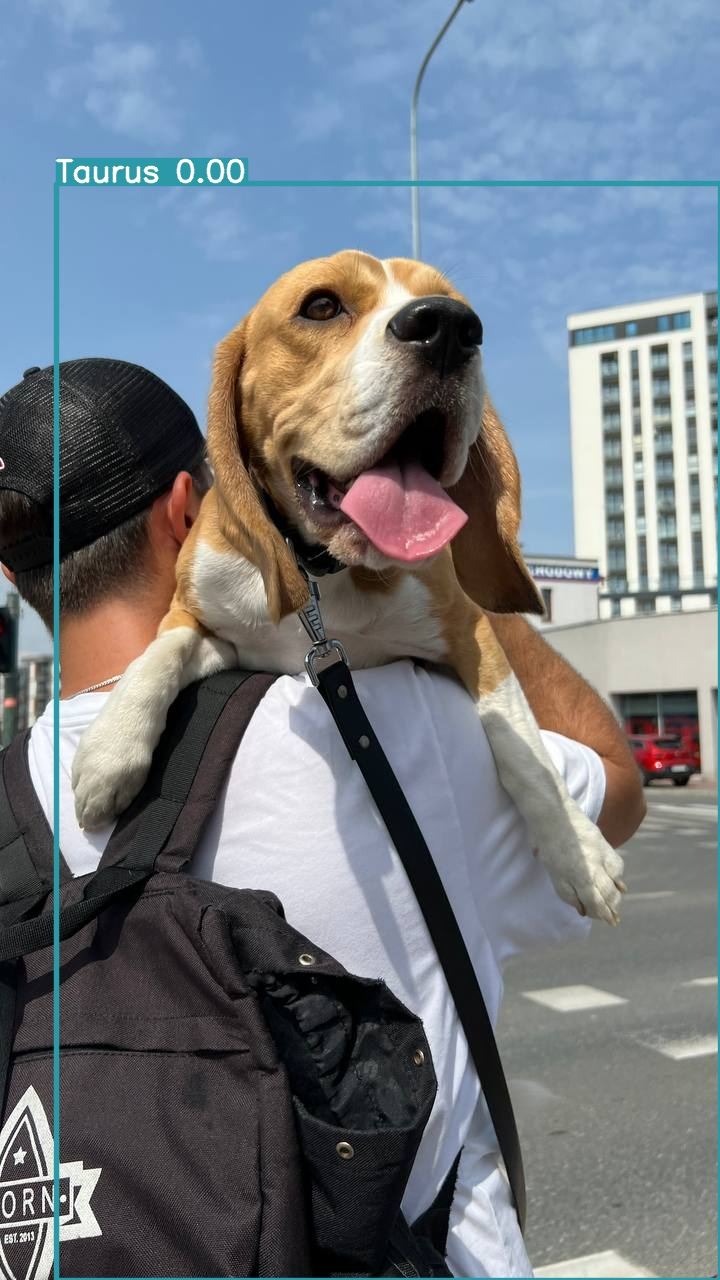

In [31]:
%cd {HOME}
Image(filename='runs/detect/predict4/dog.jpeg', height=600)

In [32]:
model.predict(source=star_image, conf=0.25, save=True) # stores result


Found https://www.star-registration.com/cdn/shop/articles/02_03_Gemini_1200x1200.png locally at 02_03_Gemini_1200x1200.png
image 1/1 /content/02_03_Gemini_1200x1200.png: 640x640 1 Gemini, 21.8ms
Speed: 4.1ms preprocess, 21.8ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Aquarius', 1: 'Aries', 2: 'Cancer', 3: 'Capricornus', 4: 'Gemini', 5: 'Leo', 6: 'Libra', 7: 'Pisces', 8: 'Sagittarius', 9: 'Scorpius', 10: 'Taurus', 11: 'Virgo'}
 orig_img: array([[[ 87,  51,  11],
         [ 87,  51,  11],
         [ 87,  51,  11],
         ...,
         [ 40,  19,   0],
         [ 41,  19,   0],
         [ 42,  20,   0]],
 
        [[ 88,  52,  11],
         [ 88,  52,  11],
         [ 87,  51,  11],
         ...,
         [ 40,  19,   0],
         [ 40,  19,   0],
         [ 41,  20,   0]],
 
        [[ 88,  52,  11],
         [ 88,  52,  11],
         [ 88,  52,  11],
         ...,
         [ 40,  19,   0],
         [ 40,  19,   0],
         [ 41,  20,   0]],
 
        ...,
 
        [[ 99,  53,  34],
         [ 99,  53,  34],
         [ 99,  53,  34],
         ...,
         [ 66,  40,  21],
         [ 66,  40,  21

/content


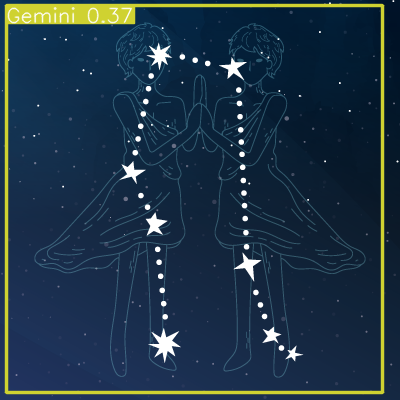

In [33]:
%cd {HOME}
Image(filename='runs/detect/predict4/02_03_Gemini_1200x1200.png', height=600)

### Let's try another example

In [36]:
multiple_star_images2 = 'https://eblanchardblog.files.wordpress.com/2016/06/shutterstock_436425853.jpg'

result =model.predict(source=multiple_star_images2, conf=0.1, save=True)


100%|██████████| 2.30M/2.30M [00:00<00:00, 59.0MB/s]
image 1/1 /content/shutterstock_436425853.jpg: 640x640 3 Geminis, 17.2ms
Speed: 4.2ms preprocess, 17.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4


/content


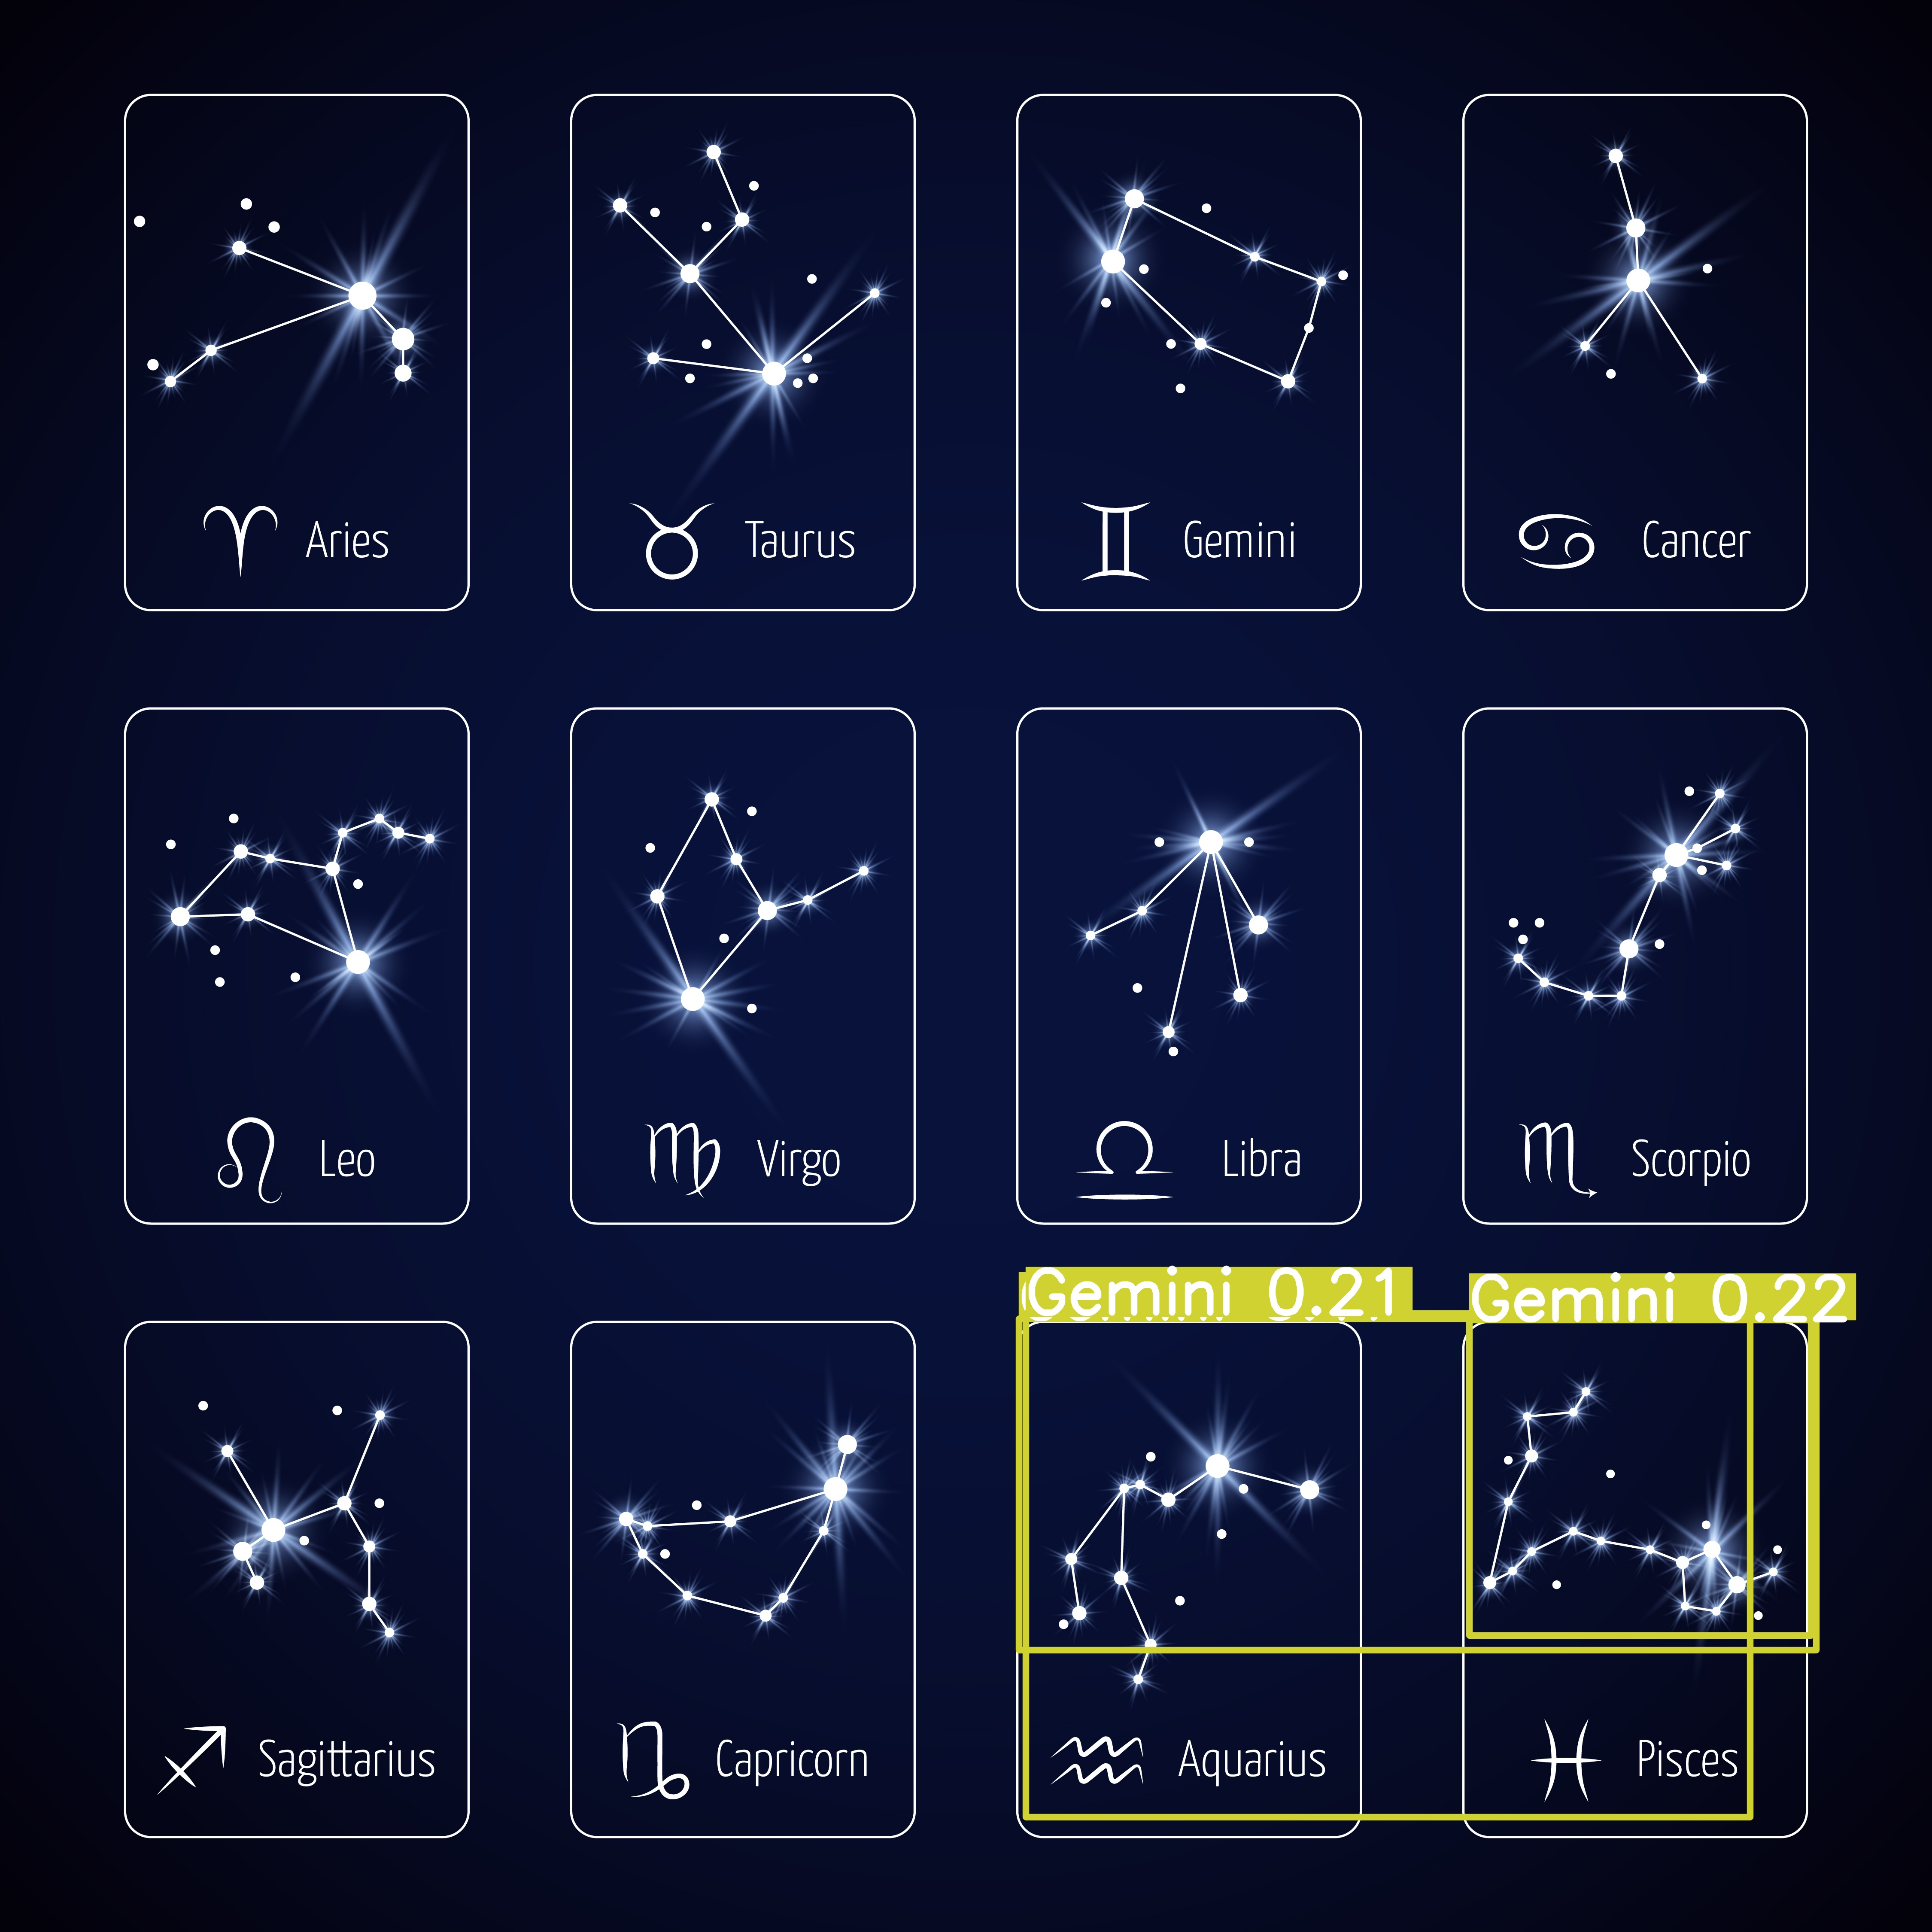

In [37]:
%cd {HOME}
Image(filename='runs/detect/predict4/shutterstock_436425853.jpg', height=600)

As you can see, the model can still be improved...

## Summary

In this notebook we have first used a classification model to detect objects in an image. Then we used a custom dataset to train a object detection model which we later on validated using the CLI and python.

Now it's your turn - let's try out to use YOLO for your use case. Have fun! 😺

Further links
  - [Roboflow notebooks](https://github.com/roboflow/notebooks/tree/main/notebooks)
  - [Ultralytics docs](https://docs.ultralytics.com/)
